<a href="https://colab.research.google.com/github/Sayan108/Fazen-A-Command-Prompt-Graphics-Engine/blob/master/Digit_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import tensorflow as tf
from tensorflow import keras

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
digit_mnist=keras.datasets.mnist

In [ ]:
digit_mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [ ]:
digit_mnist=keras.datasets.mnist
(x_train_full,y_train_full),(x_test,y_test)=digit_mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


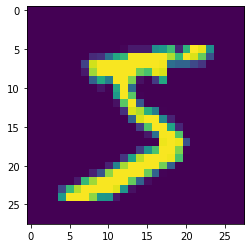

In [ ]:
plt.imshow(x_train_full[0])

In [ ]:
y_train_full[0]

5

In [ ]:
class_names=["0","1","2","3","4","5","6","7","8","9"]

In [ ]:
class_names[y_train_full[0]]

'5'

In [ ]:
x_train_full[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
x_train_n=x_train_full/255.
x_test_n=x_test/255.

In [ ]:
x_valid,x_train =x_train_n[:6000] , x_train_n[6000:]
y_valid,y_train =y_train_full[:6000] , y_train_full[6000:]
x_test = x_test_n

In [ ]:
x_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(200,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


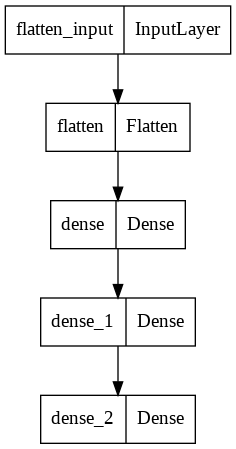

In [ ]:
import pydot
keras.utils.plot_model(model)

In [ ]:
weights,biases=model.layers[1].get_weights()

In [ ]:
weights

array([[ 0.02570029, -0.00921319, -0.02297589, ...,  0.03759523,
         0.01990343, -0.00419658],
       [ 0.0493257 ,  0.07532704,  0.04591972, ...,  0.01272719,
         0.07017377,  0.06893378],
       [-0.00902112,  0.0490617 ,  0.01508749, ...,  0.00632862,
        -0.02900814, -0.04371899],
       ...,
       [ 0.06044598,  0.02830634,  0.04788385, ..., -0.02156743,
        -0.06206664, -0.06688078],
       [ 0.03822813,  0.07278952,  0.02177001, ..., -0.04696669,
        -0.04292265,  0.0316055 ],
       [-0.01534326, -0.03178874, -0.04308994, ...,  0.00643031,
         0.02572545, -0.03443564]], dtype=float32)

In [ ]:
weights.shape

(784, 200)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
biases.shape

(200,)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy" ,
             optimizer="sgd",
             metrics=["accuracy"])

In [ ]:
model_history=model.fit(x_train,y_train,epochs=60,
                       validation_data=(x_valid,y_valid))

Epoch 1/60
1688/1688 [==============================] - 8s 4ms/step - loss: 0.6607 - accuracy: 0.8267 - val_loss: 0.3216 - val_accuracy: 0.9125
Epoch 2/60
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3006 - accuracy: 0.9141 - val_loss: 0.2585 - val_accuracy: 0.9283
Epoch 3/60
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2488 - accuracy: 0.9292 - val_loss: 0.2254 - val_accuracy: 0.9383
Epoch 4/60
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2151 - accuracy: 0.9390 - val_loss: 0.1961 - val_accuracy: 0.9442
Epoch 5/60
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1893 - accuracy: 0.9461 - val_loss: 0.1790 - val_accuracy: 0.9485
Epoch 6/60
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1690 - accuracy: 0.9517 - val_loss: 0.1637 - val_accuracy: 0.9523
Epoch 7/60
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1521 - accuracy: 0.9569 - val_loss: 0.1482 - val_accuracy:

In [25]:
model_history.params

{'epochs': 60, 'steps': 1688, 'verbose': 1}

In [26]:
model_history.history

{'accuracy': [0.8267222046852112,
  0.9140740633010864,
  0.9292222261428833,
  0.9390000104904175,
  0.9461296200752258,
  0.9517407417297363,
  0.9569073915481567,
  0.9611111283302307,
  0.964129626750946,
  0.9672777652740479,
  0.9697592854499817,
  0.9723703861236572,
  0.9746851921081543,
  0.9765740633010864,
  0.9777407646179199,
  0.9793333411216736,
  0.9809814691543579,
  0.9819074273109436,
  0.9829444289207458,
  0.9841481447219849,
  0.9850925803184509,
  0.9859814643859863,
  0.9864814877510071,
  0.987407386302948,
  0.988444447517395,
  0.9888333082199097,
  0.9893703460693359,
  0.9902222156524658,
  0.9907222390174866,
  0.9915555715560913,
  0.9920555353164673,
  0.9926851987838745,
  0.9931296110153198,
  0.9937777519226074,
  0.9941296577453613,
  0.9946296215057373,
  0.9944815039634705,
  0.9953703880310059,
  0.9958703517913818,
  0.9960926175117493,
  0.9967963099479675,
  0.9969074130058289,
  0.9971481561660767,
  0.9972777962684631,
  0.9976666569709778,
 

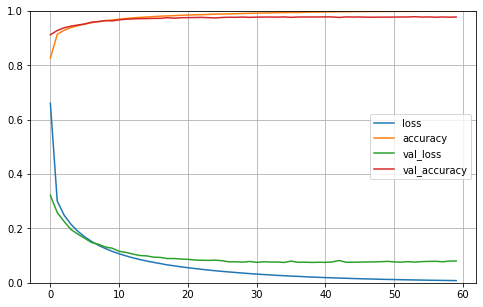

In [27]:
import pandas as pd 
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [28]:
model.evaluate(x_train,y_train)

1688/1688 [==============================] - 3s 2ms/step - loss: 0.0073 - accuracy: 0.9996


[0.007279264274984598, 0.9995926022529602]

In [29]:
x_new=x_test[:5]

In [30]:
y_proba=model.predict(x_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [31]:
y_pred=np.argmax(model.predict(x_new),axis=1)
y_pred

array([7, 2, 1, 0, 4])

In [32]:
np.array(class_names)[y_pred]

array(['7', '2', '1', '0', '4'], dtype='<U1')

AxesImage(54,36;334.8x217.44)


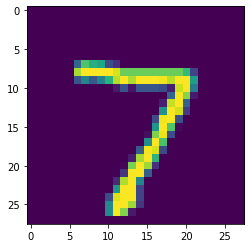

In [33]:
print(plt.imshow(x_test[0]))

AxesImage(54,36;334.8x217.44)


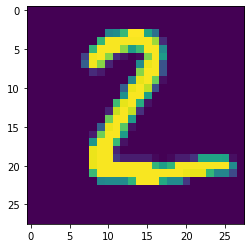

In [34]:
print(plt.imshow(x_test[1]))

AxesImage(54,36;334.8x217.44)


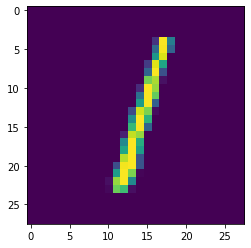

In [36]:
print(plt.imshow(x_test[2]))

AxesImage(54,36;334.8x217.44)


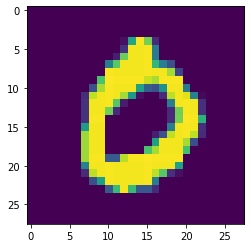

In [37]:
print(plt.imshow(x_test[3]))

AxesImage(54,36;334.8x217.44)


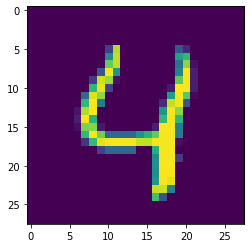

In [35]:
print(plt.imshow(x_test[4]))